In [168]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [230]:
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler , LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score , plot_confusion_matrix , f1_score

In [170]:
warnings.filterwarnings('ignore')

In [171]:
sns.set_theme(context = 'paper' , style = 'whitegrid' , palette = 'Set1' , font_scale = 1.1 , 
             rc = {'figure.figsize' : (8 , 4)})

In [172]:
%matplotlib inline

In [173]:
df = pd.read_csv('Iris (1).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [175]:
df.drop(['Id'] , axis = 1 , inplace = True)

In [176]:
df.isnull().mean()*100

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [177]:
df.duplicated().sum()

3

In [178]:
df.drop_duplicates(inplace = True , ignore_index = True)

<AxesSubplot:xlabel='Species', ylabel='count'>

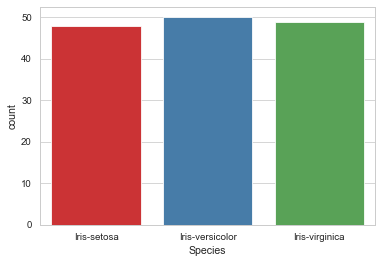

In [179]:
sns.countplot(df['Species'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

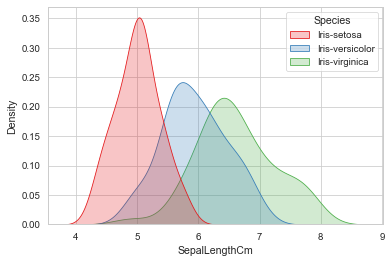

In [180]:
sns.kdeplot(df['SepalLengthCm'] , shade = True , hue = df['Species'])

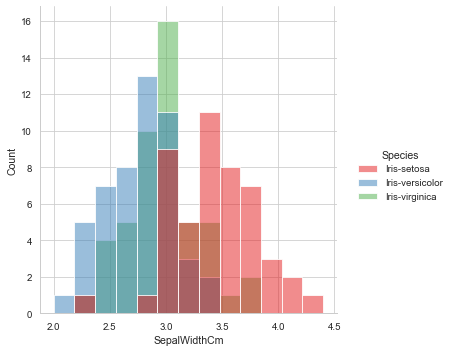

In [181]:
sns.displot(data = df ,x = df['SepalWidthCm'] , hue = df['Species'])

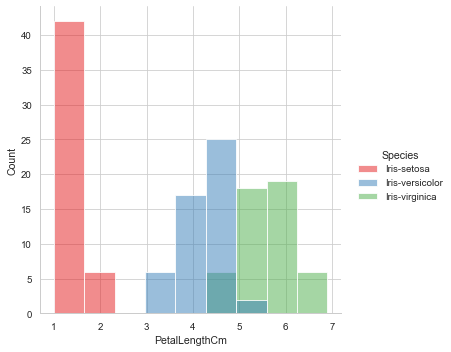

In [182]:
sns.displot(x = df['PetalLengthCm'] , hue = df['Species'])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

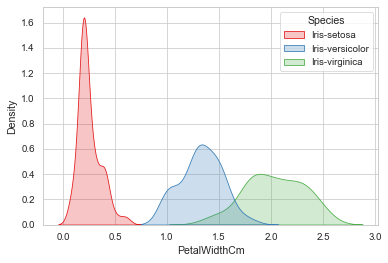

In [183]:
sns.kdeplot(x = df['PetalWidthCm'] , hue = df['Species'] , shade = True)

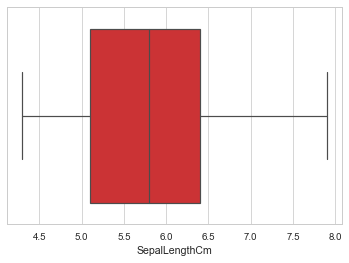

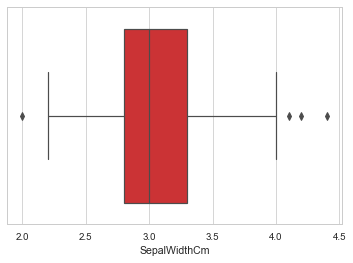

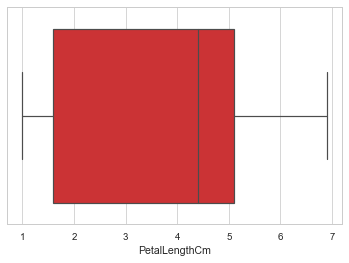

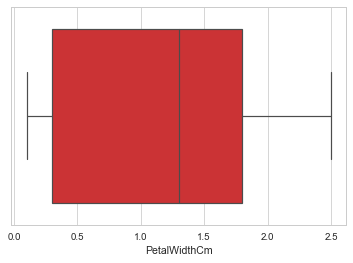

In [184]:
for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(df[col])

<AxesSubplot:>

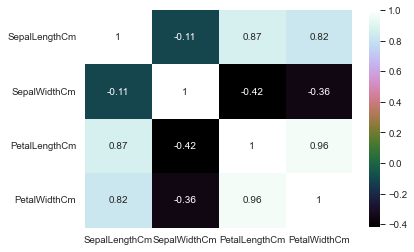

In [185]:
sns.heatmap(df.select_dtypes('number').corr() , annot = True , cmap = 'cubehelix')

In [186]:
le = LabelEncoder()

In [187]:
df['Species'] = le.fit_transform(df[['Species']])

In [188]:
x = df.drop(['Species'] , axis = 1)
y = df['Species']

In [189]:
steps = []

In [190]:
steps.append(('sclr' , RobustScaler()))
steps.append(('model' , DecisionTreeClassifier()))

In [191]:
PL = Pipeline(steps = steps)

In [192]:
PL

Pipeline(steps=[('sclr', RobustScaler()), ('model', DecisionTreeClassifier())])

In [193]:
scores = cross_validate(estimator = PL , X = x , y = y , scoring ='accuracy' , cv = 5 , return_train_score = True )

In [194]:
scores['train_score'].mean()

1.0

In [195]:
scores['test_score'].mean()

0.9521839080459771

In [214]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0 , shuffle = True , 
                                                      stratify = y)

In [215]:
PL.fit(x_train , y_train)

Pipeline(steps=[('sclr', RobustScaler()), ('model', DecisionTreeClassifier())])

In [216]:
y_train_prd = PL.predict(x_train)

In [217]:
accuracy_score(y_true = y_train , y_pred = y_train_prd)

1.0

In [218]:
le.inverse_transform(PL.classes_)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

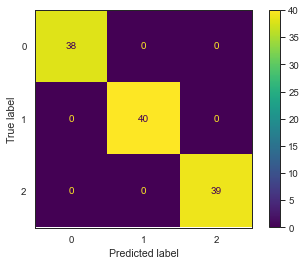

In [219]:
sns.set_style('white')
plot_confusion_matrix(PL , x_train , y_train)

In [220]:
f1_score(y_true = y_train , y_pred = y_train_prd , average = 'micro')

1.0

In [221]:
y_test_prd = PL.predict(x_test)

In [222]:
accuracy_score(y_true = y_test , y_pred = y_test_prd)

0.9666666666666667

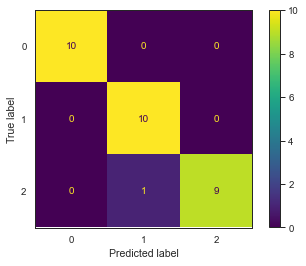

In [227]:
plot_confusion_matrix(PL , x_test , y_test)

In [228]:
f1_score(y_true = y_test , y_pred = y_test_prd , average = 'micro')

0.9666666666666667